In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

year
1949    12
1950    12
1951    12
1952    12
1953    12
1954    12
1955    12
1956    12
1957    12
1958    12
1959    12
1960    12
dtype: int64

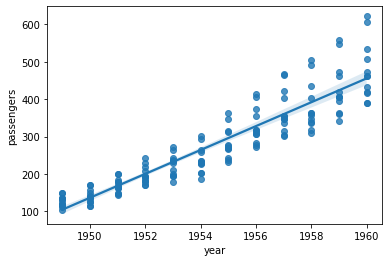

In [2]:
flights = sns.load_dataset('flights')
flights['month'] = flights['month'].astype(str)

sns.regplot(x='year',y='passengers', data=flights)

flights.value_counts('year')
# tips = sns.load_dataset("flights")
# # print(tips['month'].unique())
# tips['month'] = tips['month'].astype(str)
# tips['year-month'] = tips['year'].astype(str) + '-' + tips['month']
# print(tips.value_counts('year-month'))
# print(tips.describe())

# sns.catplot(x="year", y="passengers", data=flights)

In [3]:
pearson_coeff, p_value = stats.pearsonr(flights['year'], flights['passengers'])
print(f'Coeff: {pearson_coeff}, p Value: {float(p_value)}')


Coeff: 0.9218238352924201, p Value: 2.5810425519107687e-60


# Residual plot

Residual plot gives error between predicted value and actual value. The result is expected to have 0 mean without any curvature or pattern (i.e. it should be random) if the model is predicting correctly.

If there is curvature, then it suggests non linear regression may be more appropriate.

/home/kartik/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='passengers'>

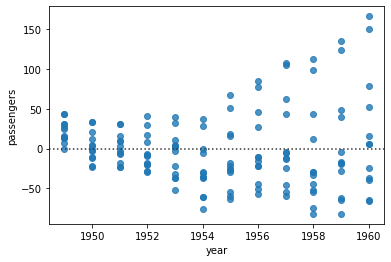

In [4]:
sns.residplot(flights['year'], flights['passengers'])

# Distribution plot

Distribution plot compares predicted values with actual values

![Distribution Plot](/home/kartik/Documents/PythonProjects/DataScience/regression/DistributionPlot.jpg)

/home/kartik/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/kartik/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='passengers', ylabel='Density'>

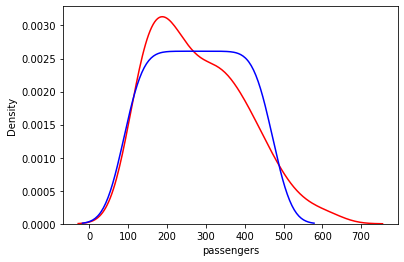

In [5]:
lm = LinearRegression()
X = flights[['year']]
Y = flights['passengers']
lm.fit(X, Y)
yhat = lm.predict(X)


ax1 = sns.distplot(flights['passengers'], hist=False, color='r', label='Actual Value')
sns.distplot(yhat, hist=False, color='b', label='Fitted Values', ax=ax1)